In [1]:
!pip install git+https://github.com/rwightman/pytorch-image-models.git

  Cloning https://github.com/rwightman/pytorch-image-models.git to /tmp/pip-req-build-bwsto8mv
  Running command git clone --filter=blob:none --quiet https://github.com/rwightman/pytorch-image-models.git /tmp/pip-req-build-bwsto8mv
  Resolved https://github.com/rwightman/pytorch-image-models.git to commit e44f14d7d2f557b9f3add82ee4f1ed2beefbb30d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for timm: filename=timm-1.0.15-py3-none-any.whl size=2361373 sha256=5a3dc460c24e322ecc7fd1f3e3eb112423ddee320cb059cc1956fbc9731748ef
  Stored in directory: /tmp/pip-ephem-wheel-cache-3ql1yagx/wheels/ed/07/8c/d16ff40e1a6ab5eff4240181152d83e10a933e1973397a1fec
Successfully built timm
  Attempting uninstall: timm
    Found existing installation: timm 1.0.12
    Uninstalling timm-1.0.12:
      Successfully uninstalled timm-1.0.12


In [2]:
import zipfile

In [3]:
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision import models
import torch
from tqdm.auto import tqdm
import numpy as np
import os
import sys
import cv2
import glob
import math
import time
import timm
import torch
import random
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from pathlib import Path
from torch import nn, optim
from torchinfo import summary
from tabulate import tabulate
from datetime import timedelta
from functools import lru_cache
import torch.nn.functional as F
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.image as mpimg
from torchvision import transforms
from PIL import Image, ImageEnhance
from joblib import Parallel, delayed
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.optim.lr_scheduler import LambdaLR
from sklearn.preprocessing import LabelEncoder
from torchvision.transforms import Resize, ToTensor
from torch.utils.data import DataLoader, random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    matthews_corrcoef, confusion_matrix, classification_report
)

In [4]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.optimizers import Adam 
from kerastuner import RandomSearch
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import warnings
warnings.filterwarnings("ignore")

<ipython-input-4-4528556261de>:17: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [5]:
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

In [6]:
!pip install gdown

In [7]:
# !gdown "https://drive.google.com/uc?id=1QAkYNXInCNX35b2lI8dXHFvVjor9AIVk"

In [8]:
# zip_path = "/kaggle/working/Copy of Copy of train.zip"  # Path to the ZIP file
# extracted_path = "/kaggle/working/chest_ctscan_images"  # Path to extract the files
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extracted_path)

In [9]:
# train_dir = "/kaggle/working/chest_ctscan_images/train"
# valid_dir = "/kaggle/working/chest_ctscan_images/valid"
# test_dir = "/kaggle/working/chest_ctscan_images/test"

In [10]:
# source_dir  = "/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset"

In [11]:
import shutil
from sklearn.model_selection import train_test_split

In [12]:
# # Create a validation set from a portion of the training set
# def create_validation_set(source_dir, validation_dir, validation_ratio=0.2):
#     if not os.path.exists(validation_dir):
#         os.makedirs(validation_dir)

#     for class_name in os.listdir(source_dir):
#         class_source_path = os.path.join(source_dir, class_name)
#         class_valid_path = os.path.join(validation_dir, class_name)

#         if not os.path.exists(class_valid_path):
#             os.makedirs(class_valid_path)

#         all_files = os.listdir(class_source_path)
#         train_files, valid_files = train_test_split(all_files, test_size=validation_ratio, random_state=42)

#         for file in valid_files:
#             shutil.move(os.path.join(class_source_path, file), os.path.join(class_valid_path, file))

# create_validation_set(train_dir, valid_dir, validation_ratio=0.2)  # Split 20% for validation

In [13]:
# # Example code to create a test set from a portion of the training set
# def create_test_set(source_dir, test_dir, test_ratio=0.1):
#     # Create test directory if it doesn't exist
#     if not os.path.exists(test_dir):
#         os.makedirs(test_dir)

#     for class_name in os.listdir(source_dir):
#         class_source_path = os.path.join(source_dir, class_name)
#         class_test_path = os.path.join(test_dir, class_name)

#         if not os.path.exists(class_test_path):
#             os.makedirs(class_test_path)

#         all_files = os.listdir(class_source_path)
#         train_files, test_files = train_test_split(all_files, test_size=test_ratio, random_state=42)

#         for file in test_files:
#             shutil.move(os.path.join(class_source_path, file), os.path.join(class_test_path, file))

# create_test_set(train_dir, test_dir, test_ratio=0.18)  # Split 10% for test

In [14]:
def split_dataset(source_dir, output_dir, train_ratio=0.7, valid_ratio=0.2):
    """
    Splits data into train, validation, and test sets.
    
    Parameters:
    - source_dir: Path to the source dataset directory.
    - output_dir: Path to the output directory for train, valid, and test sets.
    - train_ratio: Proportion of data to allocate to training.
    - valid_ratio: Proportion of data to allocate to validation.
    
    Remaining proportion will be allocated to the test set.
    """
    if not os.path.exists(source_dir):
        raise FileNotFoundError(f"Source directory not found: {source_dir}")
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Create train, valid, and test directories
    train_dir = os.path.join(output_dir, 'train')
    valid_dir = os.path.join(output_dir, 'valid')
    test_dir = os.path.join(output_dir, 'test')

    for dir_path in [train_dir, valid_dir, test_dir]:
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)

    # Iterate over classes
    for class_name in os.listdir(source_dir):
        class_source_path = os.path.join(source_dir, class_name)
        if not os.path.isdir(class_source_path):
            continue
        
        files = os.listdir(class_source_path)
        train_files, temp_files = train_test_split(files, test_size=(1 - train_ratio), random_state=42)
        valid_files, test_files = train_test_split(temp_files, test_size=(1 - valid_ratio / (1 - train_ratio)), random_state=42)

        # Create class subdirectories in train, valid, and test
        for split_dir, split_files in zip([train_dir, valid_dir, test_dir], [train_files, valid_files, test_files]):
            class_split_path = os.path.join(split_dir, class_name)
            if not os.path.exists(class_split_path):
                os.makedirs(class_split_path)

            # Copy files to respective directories
            for file in split_files:
                shutil.copy2(os.path.join(class_source_path, file), os.path.join(class_split_path, file))

    print("Dataset successfully split into train, valid, and test sets.")

# Example usage
source_dir = '/kaggle/input/ct-scan-data/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset'
output_dir = '/kaggle/working/split_dataset'

split_dataset(source_dir, output_dir, train_ratio=0.7, valid_ratio=0.2)


Dataset successfully split into train, valid, and test sets.


In [15]:
train_datagen = ImageDataGenerator()

In [16]:
valid_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

In [17]:
train_generator = train_datagen.flow_from_directory(
    "/kaggle/working/split_dataset/train",
    target_size=(224,224),
    batch_size=8,
    class_mode='categorical'
)

Found 766 images belonging to 3 classes.


In [18]:
validation_generator = valid_datagen.flow_from_directory(
    "/kaggle/working/split_dataset/valid",
    target_size=(224,224),
    batch_size=8,
    class_mode='categorical'
)

Found 219 images belonging to 3 classes.


In [19]:
test_generator = test_datagen.flow_from_directory(
    "/kaggle/working/split_dataset/test",
    target_size=(224,224),
    batch_size=8,
    class_mode='categorical'
)

Found 112 images belonging to 3 classes.


In [20]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define transformations for data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
train_dataset = datasets.ImageFolder(root='/kaggle/working/split_dataset/train', transform=transform)
val_dataset = datasets.ImageFolder(root='/kaggle/working/split_dataset/valid', transform=transform)
test_dataset = datasets.ImageFolder(root='/kaggle/working/split_dataset/test', transform=transform)

# Initialize DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)


In [21]:
device = torch.device('cuda')


In [22]:
device

device(type='cuda')

In [23]:
num_classes = 3

# Create the model
model = timm.create_model('pit_ti_224', pretrained=True)

# Modify the model's output head
model.head = torch.nn.Linear(model.head.in_features, num_classes)

# Move the model to the specified device
model.to(device)

# Print the model summary
summary(model, (3, 224, 224))  #

model.safetensors:   0%|          | 0.00/19.4M [00:00<?, ?B/s]

Layer (type:depth-idx)                             Output Shape              Param #
PoolingVisionTransformer                           [1, 3]                    46,720
├─ConvEmbedding: 1-1                               [64, 27, 27]              --
│    └─Conv2d: 2-1                                 [64, 27, 27]              49,216
├─Dropout: 1-2                                     [1, 64, 27, 27]           --
├─SequentialTuple: 1-3                             [1, 256, 7, 7]            --
│    └─Transformer: 2-2                            [1, 64, 27, 27]           --
│    │    └─Identity: 3-1                          [1, 730, 64]              --
│    │    └─Sequential: 3-2                        [1, 730, 64]              99,968
│    └─Transformer: 2-3                            [1, 128, 14, 14]          --
│    │    └─Pooling: 3-3                           [1, 128, 14, 14]          9,600
│    │    └─Identity: 3-4                          [1, 197, 128]             --
│    │    └─Sequenti

In [24]:
def custom_metrics(y_pred, y_true, loss):
    """
    Calculate custom evaluation metrics for multiclass classification.

    Args:
        y_pred (Tensor): Predicted probabilities for each class.
        y_true (Tensor): True labels.
        loss (float): Loss value.

    Returns:
        dict: Dictionary containing computed metrics.
    """
    # Calculate predicted class labels
    y_pred_classes = torch.argmax(y_pred, dim=1)

    # Calculate accuracy using predicted and true labels
    y_true_numpy = y_true.cpu().numpy()
    y_pred_classes_numpy = y_pred_classes.cpu().numpy()
    accuracy = accuracy_score(y_true_numpy, y_pred_classes_numpy)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_true_numpy, y_pred_classes_numpy, average='weighted')
    recall = recall_score(y_true_numpy, y_pred_classes_numpy, average='weighted')
    f1 = f1_score(y_true_numpy, y_pred_classes_numpy, average='weighted')

    # Compute confusion matrix for multiclass classification
    cm = confusion_matrix(y_true_numpy, y_pred_classes_numpy)
    
    # Calculate specificity, sensitivity, and MCC for multiclass classification
    tn = cm[0, 0]
    fp = cm[0, 1:].sum()
    fn = cm[1:, 0].sum()
    tp = cm[1:, 1:].sum()

    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    mcc = matthews_corrcoef(y_true_numpy, y_pred_classes_numpy)

    # Calculate AUC for each class
    num_classes = y_pred.shape[1]
    auc_scores = []

    for class_idx in range(num_classes):
        class_y_true = (y_true_numpy == class_idx).astype(np.float32)
        class_y_pred = y_pred[:, class_idx].cpu().numpy()
        auc_score = roc_auc_score(class_y_true, class_y_pred)
        auc_scores.append(auc_score)

    # Average AUC across classes
    auc_avg = np.mean(auc_scores)

    # Create a dictionary to store metrics
    metrics = {
        "loss": loss,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "auc": auc_avg,
    }

    return metrics

In [25]:
# Define the loss function and optimizer
from torch.optim.lr_scheduler import StepLR

# scheduler = StepLR(optimizer, step_size=8, gamma=0.95)

LR = 0.0005
BATCH_SIZE = 8

optimizer = torch.optim.Adam(model.parameters(), lr = LR)

criterion = torch.nn.CrossEntropyLoss() 
# criterion_DRW = torch.nn.CrossEntropyLoss(weight = weight)


In [26]:
total_epochs = 25

# Initialize lists to store metric values for each epoch
metric_names = ["loss", "accuracy", "precision", "recall", "f1_score", "auc"]
train_metrics_history = {metric_name: [] for metric_name in metric_names}
val_metrics_history = {metric_name: [] for metric_name in metric_names}

# Training and validation loop
total_training_time = 0.0
total_validation_time = 0.0

for epoch in range(total_epochs):
    start_time = time.time()
    
    # Training phase
    model.train()
    total_loss = 0.0
    all_predictions = []
    all_targets = []

    for batch_idx, (data, targets) in enumerate(tqdm(train_loader, desc=f"Training Model - Epoch [{epoch + 1}/{total_epochs}]")):
        data = data.to(device)
        targets = targets.to(device)

        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        all_predictions.extend(torch.softmax(outputs, dim=1).cpu().detach().numpy())
        all_targets.extend(targets.cpu().numpy())

    end_time = time.time()
    epoch_training_time = end_time - start_time
    total_training_time += epoch_training_time
    average_loss = total_loss / len(train_loader)

    all_predictions = np.array(all_predictions)
    all_targets = np.array(all_targets)

    train_metrics = custom_metrics(torch.tensor(all_predictions), torch.tensor(all_targets), average_loss)

    # Print training metrics in one line
    training_metrics_line = "Metrics - "
    for metric_name, metric_value in train_metrics.items():
        if metric_name == 'auc':
            training_metrics_line += f"{metric_name}: {metric_value:.4f}"
        else:
            training_metrics_line += f"{metric_name}: {metric_value:.4f}, "

    print(f"{training_metrics_line}")

    for metric_name in metric_names:
        train_metrics_history[metric_name].append(train_metrics[metric_name])

    # Validation phase
    model.eval()
    total_loss = 0.0
    all_predictions = []
    all_targets = []

    start_time = time.time()

    with torch.no_grad():
        for batch_idx, (data, targets) in enumerate(tqdm(val_loader, desc="Validating Model: ")):
            data = data.to(device)
            targets = targets.to(device)

            outputs = model(data)
            loss = criterion(outputs, targets)
            total_loss += loss.item()

            all_predictions.extend(torch.softmax(outputs, dim=1).cpu().detach().numpy())
            all_targets.extend(targets.cpu().numpy())

    end_time = time.time()
    epoch_validation_time = end_time - start_time
    total_validation_time += epoch_validation_time
    average_loss = total_loss / len(val_loader)

    all_predictions = np.array(all_predictions)
    all_targets = np.array(all_targets)

    val_metrics = custom_metrics(torch.tensor(all_predictions), torch.tensor(all_targets), average_loss)

    # Print validation metrics in one line
    validation_metrics_line = "Metrics - "
    for metric_name, metric_value in val_metrics.items():
        if metric_name == 'auc':
            validation_metrics_line += f"{metric_name}: {metric_value:.4f}"
        else:
            validation_metrics_line += f"{metric_name}: {metric_value:.4f}, "

    print(f"{validation_metrics_line}")
    
    for metric_name in metric_names:
        val_metrics_history[metric_name].append(val_metrics[metric_name])
    
#     scheduler.step()

# Calculate and display total time taken for training and validation
print(f"Total Training Time: {str(timedelta(seconds=total_training_time))}")
print(f"Total Validation Time: {str(timedelta(seconds=total_validation_time))}")

# Calculate and display average time taken per epoch for training and validation
avg_training_time_per_epoch = total_training_time / total_epochs
avg_validation_time_per_epoch = total_validation_time / total_epochs
print(f"Average Training Time per Epoch: {str(timedelta(seconds=avg_training_time_per_epoch))}")
print(f"Average Validation Time per Epoch: {str(timedelta(seconds=avg_validation_time_per_epoch))}")

Training Model - Epoch [1/25]: 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]


Metrics - loss: 1.0663, accuracy: 0.3995, precision: 0.3830, recall: 0.3995, f1_score: 0.3894, auc: 0.4811


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.42it/s]


Metrics - loss: 0.9500, accuracy: 0.5114, precision: 0.2615, recall: 0.5114, f1_score: 0.3461, auc: 0.5643


Training Model - Epoch [2/25]: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]


Metrics - loss: 0.9666, accuracy: 0.5117, precision: 0.2619, recall: 0.5117, f1_score: 0.3465, auc: 0.4748


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]


Metrics - loss: 1.0094, accuracy: 0.5114, precision: 0.2615, recall: 0.5114, f1_score: 0.3461, auc: 0.6538


Training Model - Epoch [3/25]: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]


Metrics - loss: 0.9721, accuracy: 0.4608, precision: 0.3994, recall: 0.4608, f1_score: 0.4245, auc: 0.5065


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]


Metrics - loss: 1.0589, accuracy: 0.5114, precision: 0.2615, recall: 0.5114, f1_score: 0.3461, auc: 0.6798


Training Model - Epoch [4/25]: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]


Metrics - loss: 0.9731, accuracy: 0.4595, precision: 0.3980, recall: 0.4595, f1_score: 0.4228, auc: 0.4907


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]


Metrics - loss: 0.9888, accuracy: 0.5114, precision: 0.2615, recall: 0.5114, f1_score: 0.3461, auc: 0.6975


Training Model - Epoch [5/25]: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]


Metrics - loss: 0.9584, accuracy: 0.5117, precision: 0.2619, recall: 0.5117, f1_score: 0.3465, auc: 0.5054


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]


Metrics - loss: 0.9550, accuracy: 0.5114, precision: 0.2615, recall: 0.5114, f1_score: 0.3461, auc: 0.7020


Training Model - Epoch [6/25]: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]


Metrics - loss: 0.9524, accuracy: 0.5117, precision: 0.2619, recall: 0.5117, f1_score: 0.3465, auc: 0.5187


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]


Metrics - loss: 0.9449, accuracy: 0.5114, precision: 0.2615, recall: 0.5114, f1_score: 0.3461, auc: 0.6601


Training Model - Epoch [7/25]: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]


Metrics - loss: 0.9479, accuracy: 0.5000, precision: 0.3830, recall: 0.5000, f1_score: 0.3645, auc: 0.5223


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.27it/s]


Metrics - loss: 0.9425, accuracy: 0.5114, precision: 0.2615, recall: 0.5114, f1_score: 0.3461, auc: 0.5828


Training Model - Epoch [8/25]: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]


Metrics - loss: 0.9368, accuracy: 0.5039, precision: 0.4168, recall: 0.5039, f1_score: 0.3924, auc: 0.5312


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]


Metrics - loss: 0.9349, accuracy: 0.5114, precision: 0.2615, recall: 0.5114, f1_score: 0.3461, auc: 0.6974


Training Model - Epoch [9/25]: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]


Metrics - loss: 0.9309, accuracy: 0.4739, precision: 0.4219, recall: 0.4739, f1_score: 0.4464, auc: 0.5263


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.49it/s]


Metrics - loss: 0.9780, accuracy: 0.5114, precision: 0.2615, recall: 0.5114, f1_score: 0.3461, auc: 0.7072


Training Model - Epoch [10/25]: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]


Metrics - loss: 0.9265, accuracy: 0.4896, precision: 0.4246, recall: 0.4896, f1_score: 0.4491, auc: 0.5545


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]


Metrics - loss: 0.9263, accuracy: 0.5114, precision: 0.2615, recall: 0.5114, f1_score: 0.3461, auc: 0.7399


Training Model - Epoch [11/25]: 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]


Metrics - loss: 0.9112, accuracy: 0.5209, precision: 0.6020, recall: 0.5209, f1_score: 0.3686, auc: 0.5783


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]


Metrics - loss: 0.9092, accuracy: 0.4247, precision: 0.6619, recall: 0.4247, f1_score: 0.2993, auc: 0.7515


Training Model - Epoch [12/25]: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]


Metrics - loss: 0.9214, accuracy: 0.4830, precision: 0.4192, recall: 0.4830, f1_score: 0.4438, auc: 0.5416


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]


Metrics - loss: 0.9098, accuracy: 0.5753, precision: 0.6138, recall: 0.5753, f1_score: 0.4709, auc: 0.6517


Training Model - Epoch [13/25]: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]


Metrics - loss: 0.9100, accuracy: 0.5352, precision: 0.5480, recall: 0.5352, f1_score: 0.3991, auc: 0.5722


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]


Metrics - loss: 0.9267, accuracy: 0.5205, precision: 0.6430, recall: 0.5205, f1_score: 0.3660, auc: 0.7385


Training Model - Epoch [14/25]: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]


Metrics - loss: 0.9183, accuracy: 0.5131, precision: 0.4390, recall: 0.5131, f1_score: 0.4382, auc: 0.5554


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.34it/s]


Metrics - loss: 0.8977, accuracy: 0.5799, precision: 0.5501, recall: 0.5799, f1_score: 0.5073, auc: 0.6350


Training Model - Epoch [15/25]: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]


Metrics - loss: 0.8811, accuracy: 0.5627, precision: 0.4962, recall: 0.5627, f1_score: 0.5095, auc: 0.6236


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]


Metrics - loss: 3.2002, accuracy: 0.5936, precision: 0.6289, recall: 0.5936, f1_score: 0.5008, auc: 0.6665


Training Model - Epoch [16/25]: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]


Metrics - loss: 1.1343, accuracy: 0.5091, precision: 0.4364, recall: 0.5091, f1_score: 0.4391, auc: 0.5398


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]


Metrics - loss: 0.9458, accuracy: 0.5114, precision: 0.2615, recall: 0.5114, f1_score: 0.3461, auc: 0.7559


Training Model - Epoch [17/25]: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]


Metrics - loss: 0.9600, accuracy: 0.4791, precision: 0.3864, recall: 0.4791, f1_score: 0.4002, auc: 0.5222


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]


Metrics - loss: 0.9453, accuracy: 0.5114, precision: 0.2615, recall: 0.5114, f1_score: 0.3461, auc: 0.7117


Training Model - Epoch [18/25]: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]


Metrics - loss: 0.9644, accuracy: 0.4700, precision: 0.4059, recall: 0.4700, f1_score: 0.4308, auc: 0.5062


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.63it/s]


Metrics - loss: 0.9846, accuracy: 0.5114, precision: 0.2615, recall: 0.5114, f1_score: 0.3461, auc: 0.7147


Training Model - Epoch [19/25]: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]


Metrics - loss: 0.9556, accuracy: 0.4817, precision: 0.4078, recall: 0.4817, f1_score: 0.4261, auc: 0.5240


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.13it/s]


Metrics - loss: 0.9680, accuracy: 0.5114, precision: 0.2615, recall: 0.5114, f1_score: 0.3461, auc: 0.6979


Training Model - Epoch [20/25]: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]


Metrics - loss: 0.9508, accuracy: 0.5117, precision: 0.2619, recall: 0.5117, f1_score: 0.3465, auc: 0.5090


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.05it/s]


Metrics - loss: 0.9531, accuracy: 0.5114, precision: 0.2615, recall: 0.5114, f1_score: 0.3461, auc: 0.7000


Training Model - Epoch [21/25]: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]


Metrics - loss: 0.9375, accuracy: 0.5117, precision: 0.2619, recall: 0.5117, f1_score: 0.3465, auc: 0.5673


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.65it/s]


Metrics - loss: 0.9912, accuracy: 0.5114, precision: 0.2615, recall: 0.5114, f1_score: 0.3461, auc: 0.6873


Training Model - Epoch [22/25]: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]


Metrics - loss: 0.9362, accuracy: 0.4974, precision: 0.4382, recall: 0.4974, f1_score: 0.4644, auc: 0.5447


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]


Metrics - loss: 0.9421, accuracy: 0.5114, precision: 0.2615, recall: 0.5114, f1_score: 0.3461, auc: 0.7032


Training Model - Epoch [23/25]: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]


Metrics - loss: 0.9177, accuracy: 0.4922, precision: 0.4350, recall: 0.4922, f1_score: 0.4614, auc: 0.5610


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]


Metrics - loss: 0.9379, accuracy: 0.5114, precision: 0.2615, recall: 0.5114, f1_score: 0.3461, auc: 0.6729


Training Model - Epoch [24/25]: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]


Metrics - loss: 0.9215, accuracy: 0.5013, precision: 0.4220, recall: 0.5013, f1_score: 0.4219, auc: 0.5462


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]


Metrics - loss: 0.9044, accuracy: 0.4247, precision: 0.6619, recall: 0.4247, f1_score: 0.2993, auc: 0.6576


Training Model - Epoch [25/25]: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]


Metrics - loss: 0.9105, accuracy: 0.5131, precision: 0.4373, recall: 0.5131, f1_score: 0.4384, auc: 0.5775


Validating Model: 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]

Metrics - loss: 0.9121, accuracy: 0.5114, precision: 0.2615, recall: 0.5114, f1_score: 0.3461, auc: 0.6796
Total Training Time: 0:01:13.111522
Total Validation Time: 0:00:22.615261
Average Training Time per Epoch: 0:00:02.924461
Average Validation Time per Epoch: 0:00:00.904610


In [27]:
# Testing loop
model.eval()
total_loss = 0.0
all_predictions = []
all_targets = []

with torch.no_grad():
    # Wrap the testing data loader with tqdm for a progress bar
    for batch_idx, (data, targets) in enumerate(tqdm(test_loader, desc="Testing Model")):
        data = data.to(device)
        targets = targets.to(device)

        outputs = model(data)
        loss = criterion(outputs, targets)
        total_loss += loss.item()

        # Store predictions and targets for metrics
        all_predictions.extend(outputs.detach().cpu().numpy())
        all_targets.extend(targets.detach().cpu().numpy())

# Convert lists to NumPy arrays before creating PyTorch tensors
all_predictions = np.array(all_predictions)
all_targets = np.array(all_targets)

average_loss = total_loss / len(test_loader)
test_metrics = custom_metrics(torch.tensor(all_predictions), torch.tensor(all_targets), average_loss)

# Print testing metrics in one line
testing_metrics_line = "Metrics - "
for metric_name, metric_value in test_metrics.items():
    if metric_name == 'auc':
        testing_metrics_line += f"{metric_name}: {metric_value:.4f}"
    else:
        testing_metrics_line += f"{metric_name}: {metric_value:.4f}, "

print(f"{testing_metrics_line}")

Testing Model: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

Metrics - loss: 0.9092, accuracy: 0.5089, precision: 0.2590, recall: 0.5089, f1_score: 0.3433, auc: 0.6885


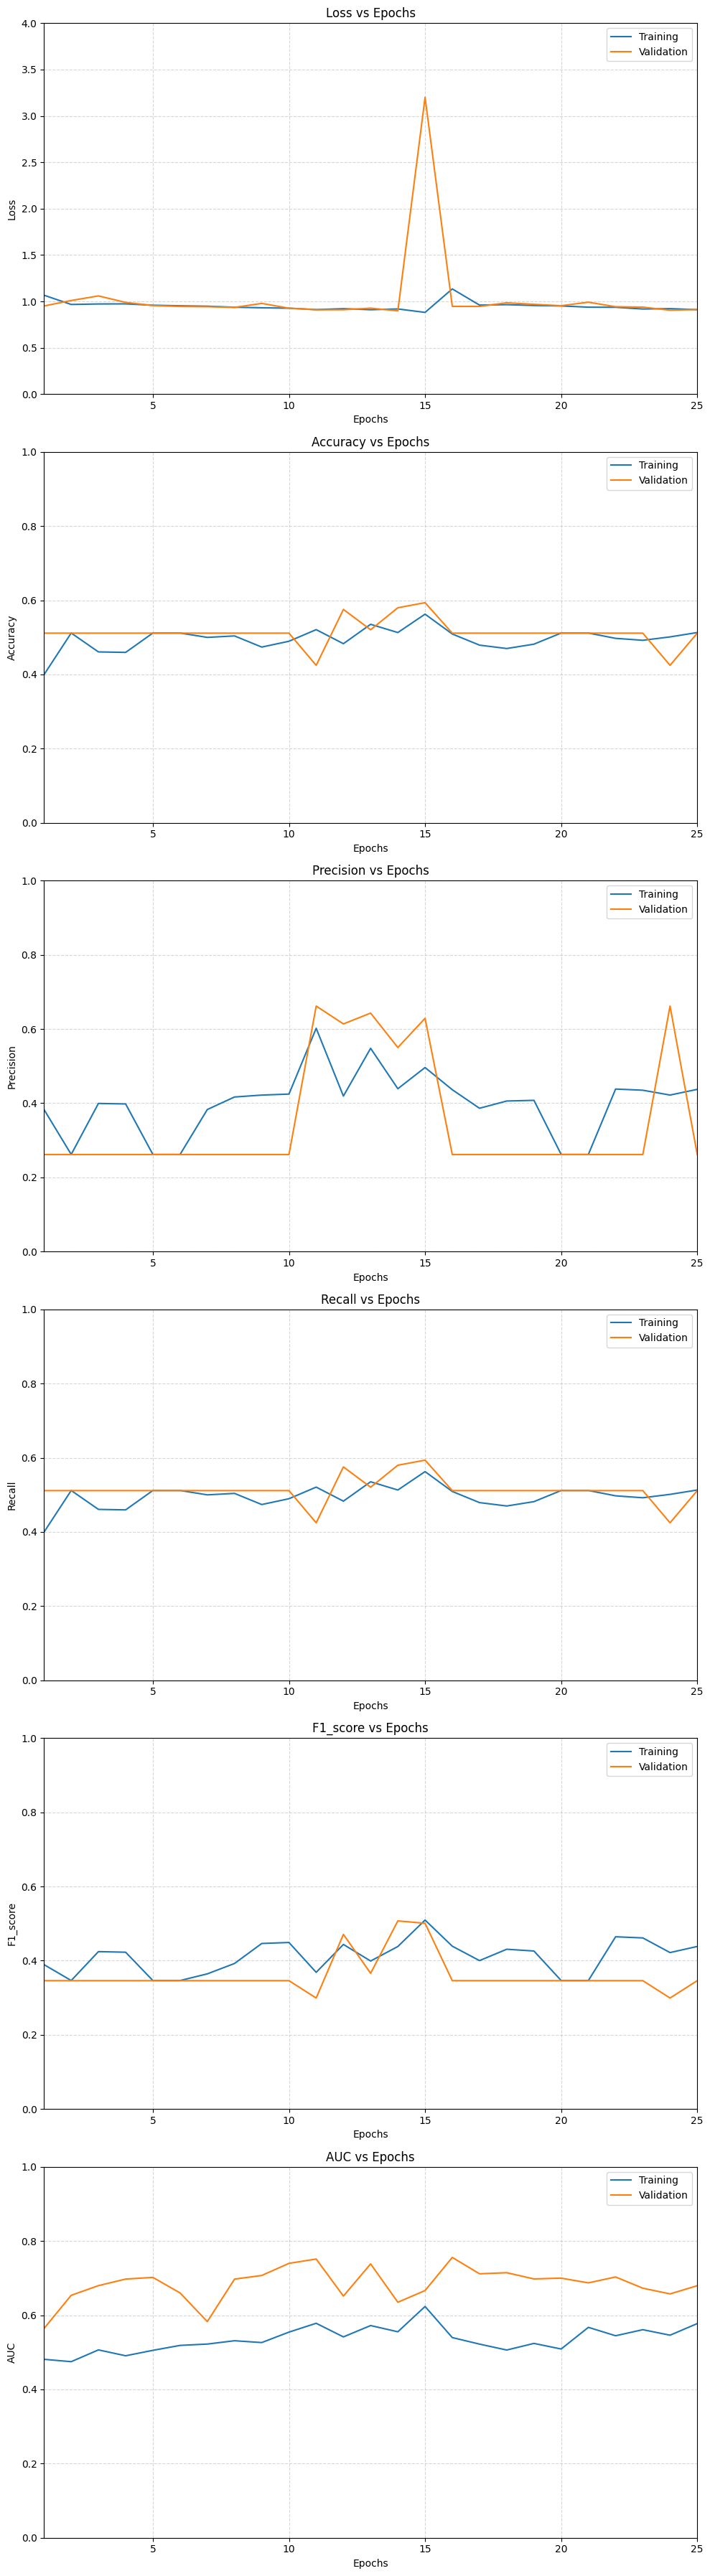

In [28]:
def plot_metrics(train_metrics_history, val_metrics_history, metric_names):
    """
    Plots the given metrics for the training and validation sets.

    Args:
        train_metrics_history: a dictionary containing training metrics history
        val_metrics_history: a dictionary containing validation metrics history
        metric_names: a list of strings representing the names of the metrics to plot

    Returns:
        None
    """
    num_metrics = len(metric_names)
    num_epochs = len(train_metrics_history[metric_names[0]])

    figure, axes = plt.subplots(num_metrics, figsize=(10, 6 * num_metrics))

    rng = range(1, num_epochs + 1)

    for ax, metric_name in zip(axes, metric_names):
        train_metric = train_metrics_history[metric_name]
        val_metric = val_metrics_history[metric_name]

        ax.plot(rng, train_metric, label="Training")
        ax.plot(rng, val_metric, label="Validation")
        ax.legend()
        ax.set_xlabel("Epochs")

        if metric_name in ("auc", "mcc"):
            ax.set_ylabel(metric_name.upper())
            ax.set_title(metric_name.upper() + " vs Epochs")
        else:
            ax.set_ylabel(metric_name.capitalize())
            ax.set_title(metric_name.capitalize() + " vs Epochs")

        max_metric = max(max(train_metric), max(val_metric))
        min_metric = min(min(train_metric), min(val_metric))
        y_max = math.ceil(max_metric)

        if min_metric > 0 or max_metric > 1:
            ax.set_ylim(0, y_max)
        else:
            ax.set_ylim(min_metric, y_max)

        ax.grid(True, linestyle='--', alpha=0.5)
        ax.set_xlim(1, num_epochs)

    plt.tight_layout()
    plt.show()

plot_metrics(train_metrics_history, val_metrics_history, metric_names)

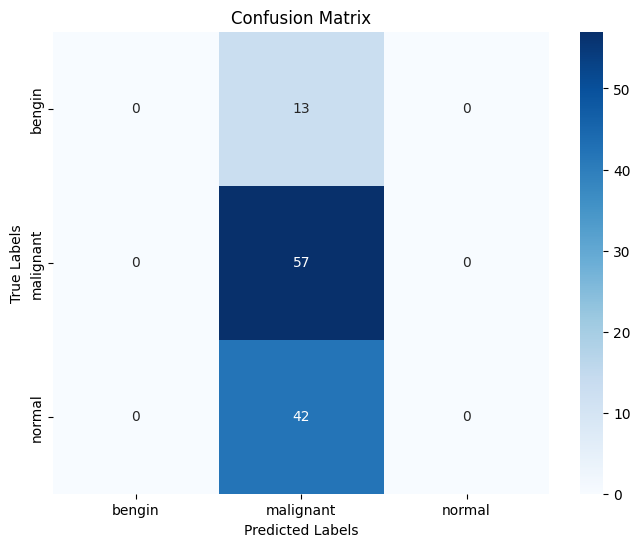

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert the softmax/logit outputs to predicted labels by taking the argmax
predicted_labels = np.argmax(all_predictions, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(all_targets, predicted_labels)

classes = ['bengin', 'malignant', 'normal']  
# Plot confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
